In [1]:
# import the modules

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

Shape of the train data is:  (4781, 17)

Statistical Properties of the train data are as follows: 
                Id        Rooms         Type         Price       Method  \
count  4781.000000  4781.000000  4781.000000  4.781000e+03  4781.000000   
mean   3432.481908     2.964861     0.540473  1.080936e+06     1.441330   
std    1953.488159     0.957911     0.837337  6.757098e+05     1.141898   
min       0.000000     1.000000     0.000000  1.450000e+05     0.000000   
25%    1757.000000     2.000000     0.000000  6.300000e+05     1.000000   
50%    3434.000000     3.000000     0.000000  9.000000e+05     1.000000   
75%    5126.000000     4.000000     1.000000  1.337000e+06     1.000000   
max    6829.000000     8.000000     2.000000  9.000000e+06     4.000000   

           SellerG     Distance     Postcode     Bathroom          Car  \
count  4781.000000  4781.000000  4781.000000  4781.000000  4781.000000   
mean    131.485254    10.045367  3103.308931     1.587952     1.605522   
std

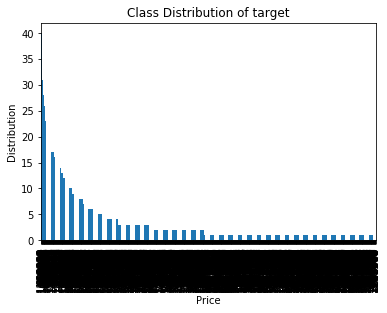

In [2]:
# read the dataset and extract the features and target separately

# Load the train data
train = pd.read_csv('Data//train.csv')

# Shape of the data
print('Shape of the train data is: ',train.shape)

print()

# Statistical properties of the data.
print('Statistical Properties of the train data are as follows: ')
print(train.describe())

# Drop the Id.
train.drop('Id',axis=1,inplace=True)

# Checking for the distribution of the target
train['Price'].value_counts().plot(kind='bar')
plt.title('Class Distribution of target')
plt.xlabel('Price')
plt.ylabel('Distribution')

print()

# Checking for skewness in the features
print('Skewness for the different features is as shown below: ')
print(train.skew())


# Code ends here.

### EDA & Data Preprocessing

- The target is the only categorical feature consisting of 7 classes and all the other features are continuous. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots. 

In [3]:

#Code starts here



# check correlation
corr=train.corr()

# print correlation
print(corr)

#Code ends here



                  Rooms      Type     Price    Method   SellerG  Distance  \
Rooms          1.000000 -0.590817  0.523579 -0.053525 -0.029506  0.289699   
Type          -0.590817  1.000000 -0.426876  0.088308  0.026955 -0.242188   
Price          0.523579 -0.426876  1.000000 -0.048165 -0.065393 -0.158197   
Method        -0.053525  0.088308 -0.048165  1.000000 -0.008889 -0.064479   
SellerG       -0.029506  0.026955 -0.065393 -0.008889  1.000000  0.024476   
Distance       0.289699 -0.242188 -0.158197 -0.064479  0.024476  1.000000   
Postcode       0.050753  0.018737  0.120166 -0.034679 -0.001913  0.414110   
Bathroom       0.607276 -0.276890  0.493173 -0.013801 -0.034939  0.114934   
Car            0.420030 -0.278868  0.237160 -0.019285 -0.000271  0.257264   
Landsize       0.092030 -0.043433  0.072753 -0.021601 -0.028470  0.063563   
BuildingArea   0.595395 -0.386768  0.519207 -0.048287 -0.042596  0.145823   
YearBuilt     -0.056373  0.304479 -0.297060  0.021274 -0.000680  0.252163   

## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [4]:
# Code starts here
#Indepenent varibles
X = train.drop('Price',axis=1)

# store dependent variable
y = train['Price']

# spliting the dataframe

X_train,X_val,y_train,y_val=train_test_split(X,y ,test_size=0.3,random_state=8)

#Instantiate linear regression model
regressor=LinearRegression()

# fit the model
regressor.fit(X_train,y_train)

# predict the result
y_pred =regressor.predict(X_val)


# Calculate r2_score
r2 = r2_score(y_val, y_pred)

#print r2
print(r2)

# Code ends here

0.6709784755252299


In [5]:
# Predict the price of the house using a lasso regressor. Check if there is any improvement in the prediction.

# instantiate lasso model
lasso = Lasso()

# fit and predict
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_val)

# calculate RMSE
r2_lasso = r2_score(y_val, lasso_pred)
print (r2_lasso)


0.670978141417018


In [6]:
# Let's check the house price prediction using a ridge regressor.

# instantiate lasso model
ridge = Ridge()

# fit and predict
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_val)

# calculate RMSE)
r2_ridge = r2_score(y_val, ridge_pred)
print (r2_ridge)


0.6707652090660223


In [7]:
# Next predict the house price using cross-validated estimators which are the part of the Model selection: choosing estimators and their parameters.

# Initiate Linear Regression Model
regressor=LinearRegression()

# Initiate cross validation score
score= cross_val_score(regressor,X_train,y_train ,scoring= 'r2' ,cv=10)
print(score)
#calculate mean of the score
mean_score = np.mean(score)

# print mean score
print(mean_score)

[0.57769766 0.69786557 0.68962943 0.21091495 0.54907255 0.63559724
 0.45884698 0.65518455 0.61303293 0.58507978]
0.5672921638321331


#### As you can see that there is very less improvement(~1%), even after applying the regularization and cross-validation score, perform the prediction using a polynomial regressor to generate second-degree polynomial features. 

In [8]:

# make pipeline for second degree polynomialfeatures
model = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Fit the model on training set
model.fit(X_train, y_train)

# predict the model performance
y_pred = model.predict(X_val)

# calculate r2 score
r2_poly= r2_score(y_val,y_pred)

# print r2 score
print(r2)

0.6709784755252299


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [9]:
# Prediction on test data

# Read the test data
test = pd.read_csv('Data//test.csv')

# Storing the id from the test file
id_ = test['Id']

# Applying the same transformation on test data
test.drop('Id',axis=1,inplace=True)

# Predict on the test data using the best model
y_pred_test = model.predict(test)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Price':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission1.csv',index=False)